# Analizador de Ventas

### Objetivo
Crear un programa en Python que analice un conjunto de **datos de ventas de una tienda**. El programa debe realizar varias operaciones de Data Science para proporcionar información valiosa sobre las ventas de la tienda.

### Consigna

1. **Lectura de Datos**: Crear un DataFrame que contenga los datos del archivo **Datos_Ventas_Tienda.csv**. El archivo incluirá información como *fecha de venta*, *categoría de producto*, *cantidad vendida* y *precio*.
2. **Fusión de Datos**: Crear un segundo DataFrame que contenga los datos del archivo **Datos_Ventas_Tienda2.csv**, y concaténalos para tener un solo dataFrame con toda la información.

3. **Tratamiento de Datos**: Utiliza Pandas para manipular estos datos. Deberás realizar tareas como limpieza de datos, filtrado y  transformaciones básicas.
4. **Análisis de Ventas**: Realizar análisis para responder preguntas como:
- ¿Cuál es el producto más vendido?
- ¿Cuál es el mes con más ventas?
5. **Datos Agrupados**: Agrupa los datos por categoría de producto y analiza las ventas por categoría.
6. **Guardar Resultados**: Al final, guarda el DataFrame completo (incluyendo la columna de meses) en un archivo .csv en tu ordenador.

### **Configuración e Importación de Librerías**
En esta sección, se importan las librerías necesarias para el análisis de datos. \
Pandas es crucial para la manipulación y el análisis de DataFrames, mientras que Matplotlib se utilizará para la visualización de los datos.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### **1. Carga y Exploración de los Datos**
Primero, cargamos los dos archivos CSV que contienen los datos de ventas en DataFrames separados. \
Esto nos permite ver la estructura inicial de los datos antes de unirlos. \
Se utiliza .head() para una vista previa de las primeras 10 filas y confirmar que la carga fue exitosa.

In [2]:
url1 = 'C:/Users/btole/Desktop/Pandas Udemy/Proyecto dia 7/Datos_Ventas_Tienda.csv'
url2 = 'C:/Users/btole/Desktop/Pandas Udemy/Proyecto dia 7/Datos_Ventas_Tienda2.csv'

df1 = pd.read_csv(url1)
df1.head(10)

,Fecha,Producto,Cantidad,Precio Unitario,Total Venta
0,1/17/2023,Electrónic,7,200,1400
1,9/1/2023,Electrónic,8,200,1600
2,7/29/2023,Juguetes,3,30,90
3,10/4/2023,Alimentos,4,10,40
4,2/28/2023,Electrónic,6,200,1200
5,3/11/2023,Ropa,9,50,450
6,11/3/2023,Juguetes,4,30,120
7,11/8/2023,Ropa,9,50,450
8,3/22/2023,Ropa,10,50,500
9,9/29/2023,Ropa,1,50,50


In [3]:
df2 = pd.read_csv(url2)
df2.head(10)

,Fecha,Producto,Cantidad,Precio Unitario,Total Venta
0,8/25/2023,Electrónic,5,200,1000
1,8/14/2023,Alimentos,9,10,90
2,8/30/2023,Ropa,6,50,300
3,11/9/2023,Alimentos,2,10,20
4,10/26/2023,Ropa,8,50,400
5,12/1/2023,Juguetes,2,30,60
6,5/16/2023,Electrónic,4,200,800
7,2/9/2023,Libros,1,20,20
8,1/9/2023,Electrónic,2,200,400
9,5/3/2023,Electrónic,6,200,1200


### **2. Consolidación de los Datos**
Para realizar un análisis completo, se concatenan los dos DataFrames (df1 y df2) en un único DataFrame llamado df. \
El parámetro ignore_index=True es importante para reestablecer el índice y evitar duplicados.

In [4]:
df = pd.concat([df1,df2],ignore_index=True)
df

,Fecha,Producto,Cantidad,Precio Unitario,Total Venta
0,1/17/2023,Electrónic,7,200,1400
1,9/1/2023,Electrónic,8,200,1600
2,7/29/2023,Juguetes,3,30,90
3,10/4/2023,Alimentos,4,10,40
4,2/28/2023,Electrónic,6,200,1200
...,...,...,...,...,...
1045,9/11/2023,Juguetes,10,30,300
1046,1/3/2023,Juguetes,10,30,300
1047,11/7/2023,Alimentos,3,10,30
1048,8/20/2023,Electrónic,6,200,1200


### **3. Tratamiento y Limpieza de los Datos**
Esta es una fase crítica del análisis de datos. Aquí se realizan dos operaciones principales de limpieza para asegurar la calidad de los datos: \
Conversión de Formato de Fecha: La columna 'Fecha' se convierte al tipo de dato datetime y luego se formatea a dd/mm/yyyy para su correcta manipulación y legibilidad. \
Estandarización de Nombres de Producto: Se corrige un error tipográfico en la columna 'Producto', estandarizando 'Electrónic' a 'Electrónica'.

In [50]:
df.head()

,Fecha,Producto,Cantidad,Precio Unitario,Total Venta,Mes_Nombre
0,2023-01-01,Alimentos,3,10,30,January
1,2023-01-01,Libros,8,20,160,January
2,2023-01-01,Alimentos,2,10,20,January
3,2023-02-01,Juguetes,9,30,270,February
4,2023-02-01,Electrónica,10,200,2000,February


In [6]:
# Convertimos la fecha de str a int y mantenemos el formato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%m/%d/%Y') 

# Cambiar la forma en que se muestra la fecha (pero sigue siendo datetime)
df['Fecha'] = df['Fecha'].dt.strftime('%d/%m/%Y')

In [7]:
# Cambiamos el nombre Electrónic por Electrónica en la columna Producto
df['Producto'] = df['Producto'].replace('Electrónic', 'Electrónica')
df.head(10)

,Fecha,Producto,Cantidad,Precio Unitario,Total Venta
0,17/01/2023,Electrónica,7,200,1400
1,01/09/2023,Electrónica,8,200,1600
2,29/07/2023,Juguetes,3,30,90
3,04/10/2023,Alimentos,4,10,40
4,28/02/2023,Electrónica,6,200,1200
5,11/03/2023,Ropa,9,50,450
6,03/11/2023,Juguetes,4,30,120
7,08/11/2023,Ropa,9,50,450
8,22/03/2023,Ropa,10,50,500
9,29/09/2023,Ropa,1,50,50


In [8]:
# Ordenamos por fecha
df.sort_values(by='Fecha', ascending=True, inplace=True)
df.head(10)

,Fecha,Producto,Cantidad,Precio Unitario,Total Venta
374,01/01/2023,Alimentos,3,10,30
717,01/01/2023,Libros,8,20,160
932,01/01/2023,Alimentos,2,10,20
346,01/02/2023,Juguetes,9,30,270
359,01/02/2023,Electrónica,10,200,2000
595,01/02/2023,Libros,1,20,20
244,01/03/2023,Electrónica,4,200,800
487,01/03/2023,Libros,7,20,140
476,01/03/2023,Ropa,4,50,200
368,01/04/2023,Ropa,7,50,350


In [9]:
# Eliminamos duplicados
df.drop_duplicates(inplace=True)
df.head(20)

,Fecha,Producto,Cantidad,Precio Unitario,Total Venta
374,01/01/2023,Alimentos,3,10,30
717,01/01/2023,Libros,8,20,160
932,01/01/2023,Alimentos,2,10,20
346,01/02/2023,Juguetes,9,30,270
359,01/02/2023,Electrónica,10,200,2000
595,01/02/2023,Libros,1,20,20
244,01/03/2023,Electrónica,4,200,800
487,01/03/2023,Libros,7,20,140
476,01/03/2023,Ropa,4,50,200
368,01/04/2023,Ropa,7,50,350


In [10]:
# Reseteamos el index
df.reset_index(drop=True, inplace=True)
df.head(10)

,Fecha,Producto,Cantidad,Precio Unitario,Total Venta
0,01/01/2023,Alimentos,3,10,30
1,01/01/2023,Libros,8,20,160
2,01/01/2023,Alimentos,2,10,20
3,01/02/2023,Juguetes,9,30,270
4,01/02/2023,Electrónica,10,200,2000
5,01/02/2023,Libros,1,20,20
6,01/03/2023,Electrónica,4,200,800
7,01/03/2023,Libros,7,20,140
8,01/03/2023,Ropa,4,50,200
9,01/04/2023,Ropa,7,50,350


### **4. Análisis Exploratorio de Datos (EDA)**
Se llevan a cabo varios análisis para obtener información clave de las ventas.

**¿Cuál es el producto más vendido?** \
Se agrupan los datos por 'Producto' y se suman las cantidades vendidas para identificar el producto con la mayor cantidad de unidades vendidas.

In [11]:
productos_mas_vendidos = pd.DataFrame(df.groupby(by='Producto')['Cantidad'].sum())
productos_mas_vendidos.reset_index(inplace=True)
productos_mas_vendidos.sort_values(by='Cantidad', ascending=False, inplace=True)
productos_mas_vendidos

,Producto,Cantidad
0,Alimentos,1223
1,Electrónica,1203
4,Ropa,1098
2,Juguetes,1095
3,Libros,1023


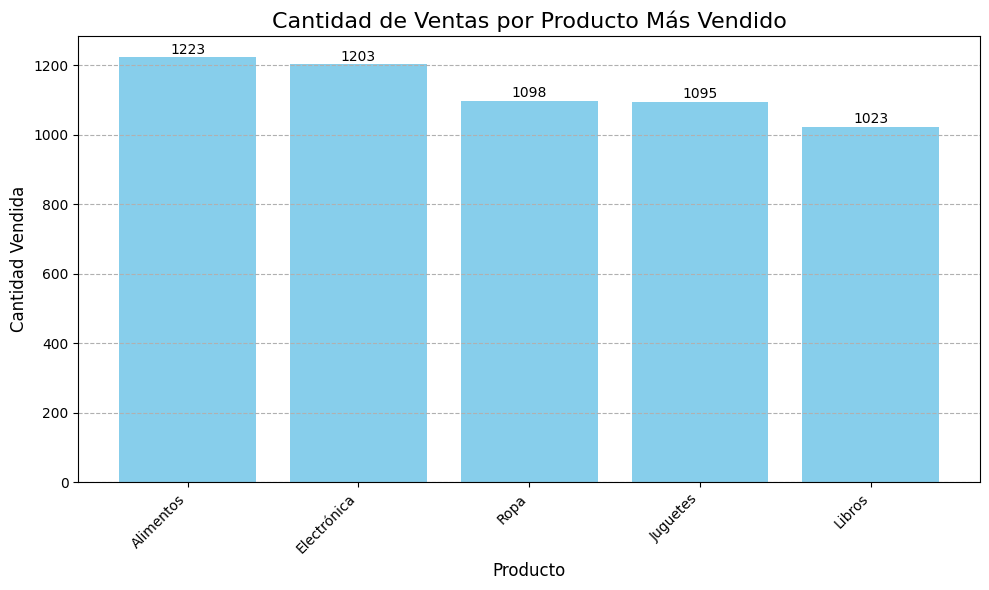

In [ ]:
plt.figure(figsize=(10, 6))  
plt.bar(productos_mas_vendidos['Producto'], productos_mas_vendidos['Cantidad'], color='skyblue') # Agrega color a las barras

# Agrega título y etiquetas de los ejes
plt.title('Cantidad de Ventas por Producto Más Vendido', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)

# Rotación de etiquetas del eje X si es necesario
plt.xticks(rotation=45, ha='right')

# Agrega valores en las barras (opcional)
for i, v in enumerate(productos_mas_vendidos['Cantidad']):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
    
# Agrega cuadrícula en el eje Y (opcional)
plt.grid(axis='y', linestyle='--')

plt.tight_layout()  # Ajusta los márgenes para evitar que las etiquetas se corten
plt.show()

**¿Cuál es el mes con mas ventas?** \
Para responder a esta pregunta, primero se necesita una columna que contenga solo el nombre del mes. \
Luego, se agrupan los datos por mes y se calcula la suma del 'Total Venta' para encontrar el mes más lucrativo.

In [12]:
# Convertimos la fecha de str a int y mantenemos el formato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y') 

In [13]:
# Creamos una columna para el nombre del mes
df_meses = df
df_meses['Mes_Nombre'] = df_meses['Fecha'].dt.strftime('%B')


In [14]:
# Esto es para poder ordenar los meses como una categoria ya que son una string

# 1. Definir el orden correcto de los meses
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# 2. Convertir la columna 'Mes_Nombre' a tipo 'category' con el orden especificado
df_meses['Mes_Nombre'] = pd.Categorical(df_meses['Mes_Nombre'],
                                                categories=orden_meses,
                                                ordered=True)



**Mes con mayores ventas**

In [51]:
mes_mas_ventas = pd.DataFrame(df_meses.groupby('Mes_Nombre')['Cantidad'].sum())
mes_mas_ventas

C:\Users\btole\AppData\Local\Temp\ipykernel_28644\982604461.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mes_mas_ventas = pd.DataFrame(df_meses.groupby('Mes_Nombre')['Cantidad'].sum())


,Cantidad
Mes_Nombre,
January,548
February,341
March,483
April,454
May,528
June,447
July,432
August,657
September,416


**Aquí se utiliza un gráfico de líneas para mostrar la tendencia de las ventas a lo largo del año.**

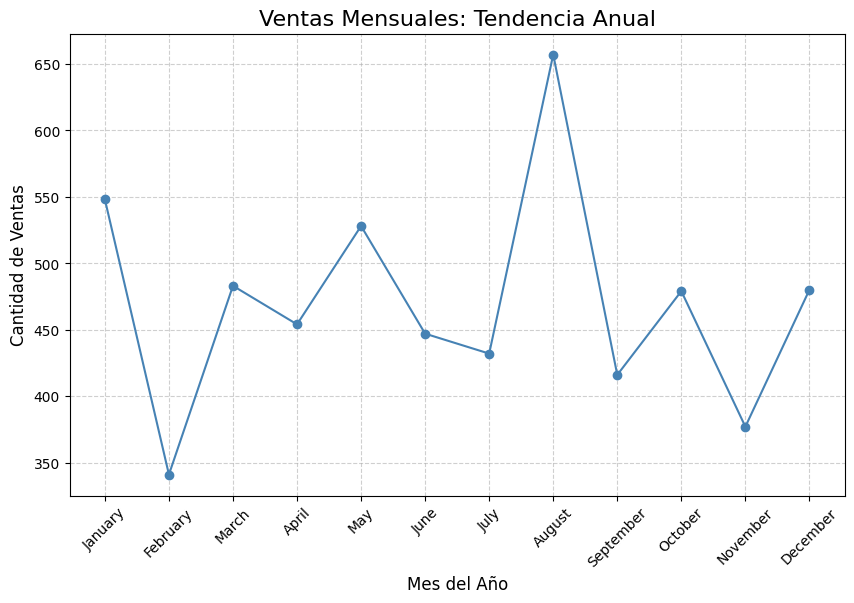

In [38]:
plt.figure(figsize=(10, 6)) # Adjusts the plot size

plt.plot(mes_mas_ventas.index, mes_mas_ventas['Cantidad'], 
         marker='o', # Adds circular markers to each data point
         linestyle='-', # Uses a solid line
         color='steelblue') # Sets the line color

# Add a title and axis labels
plt.title('Ventas Mensuales: Tendencia Anual', fontsize=16)
plt.xlabel('Mes del Año', fontsize=12)
plt.ylabel('Cantidad de Ventas', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Rotate X-axis labels to prevent overlap
plt.xticks(rotation=45)

plt.show()

### **5. Agrupación y Análisis de Ventas por Categoría**
Se crea un nuevo DataFrame que agrupa las ventas por 'Producto' y 'Mes_Nombre' para un análisis más granular, \
permitiendo entender la distribución de las ventas de cada categoría a lo largo del tiempo.

**Total de ventas por producto y por mes**

In [ ]:
# Creamos el dataframe con el total de productos vendidos por mes
ventas_categoria = pd.DataFrame(df_meses.groupby(['Producto', 'Mes_Nombre'])['Total Venta'].sum())
ventas_categoria.sort_values(by=['Producto','Mes_Nombre'], inplace=True, ascending=True)
ventas_categoria

In [ ]:
# Creamos un pivot table para mejorar la lectura de los datos
ventas_categoria_pivot = pd.pivot_table(values='Total Venta', index='Producto', columns='Mes_Nombre', data=ventas_categoria)
ventas_categoria_pivot = ventas_categoria_pivot.applymap(lambda x: f'${x:,.2f}')
ventas_categoria_pivot

C:\Users\btole\AppData\Local\Temp\ipykernel_28644\2858203577.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ventas_categoria_pivot = pd.pivot_table(values='Total Venta', index='Producto', columns='Mes_Nombre', data=ventas_categoria)
C:\Users\btole\AppData\Local\Temp\ipykernel_28644\2858203577.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ventas_categoria_pivot = ventas_categoria_pivot.applymap(lambda x: f'${x:,.2f}')


Mes_Nombre,January,February,March,April,May,June,July,August,September,October,November,December
Producto,,,,,,,,,,,,
Alimentos,$850.00,$810.00,$850.00,$950.00,"$1,280.00","$1,070.00",$970.00,"$1,520.00","$1,070.00","$1,070.00",$780.00,"$1,010.00"
Electrónica,"$29,600.00","$21,800.00","$11,000.00","$11,600.00","$30,800.00","$22,000.00","$15,800.00","$31,200.00","$17,400.00","$13,600.00","$12,400.00","$23,400.00"
Juguetes,"$2,940.00","$1,080.00","$3,570.00","$3,840.00","$2,670.00","$2,490.00","$2,250.00","$2,550.00","$2,220.00","$4,050.00","$2,880.00","$2,310.00"
Libros,"$1,680.00","$1,540.00","$2,280.00","$1,460.00","$2,180.00","$1,720.00","$1,200.00","$2,440.00","$1,520.00","$1,260.00","$1,400.00","$1,780.00"
Ropa,"$6,650.00","$1,900.00","$5,500.00","$5,000.00","$2,400.00","$3,050.00","$6,050.00","$7,100.00","$3,600.00","$5,300.00","$3,550.00","$4,800.00"


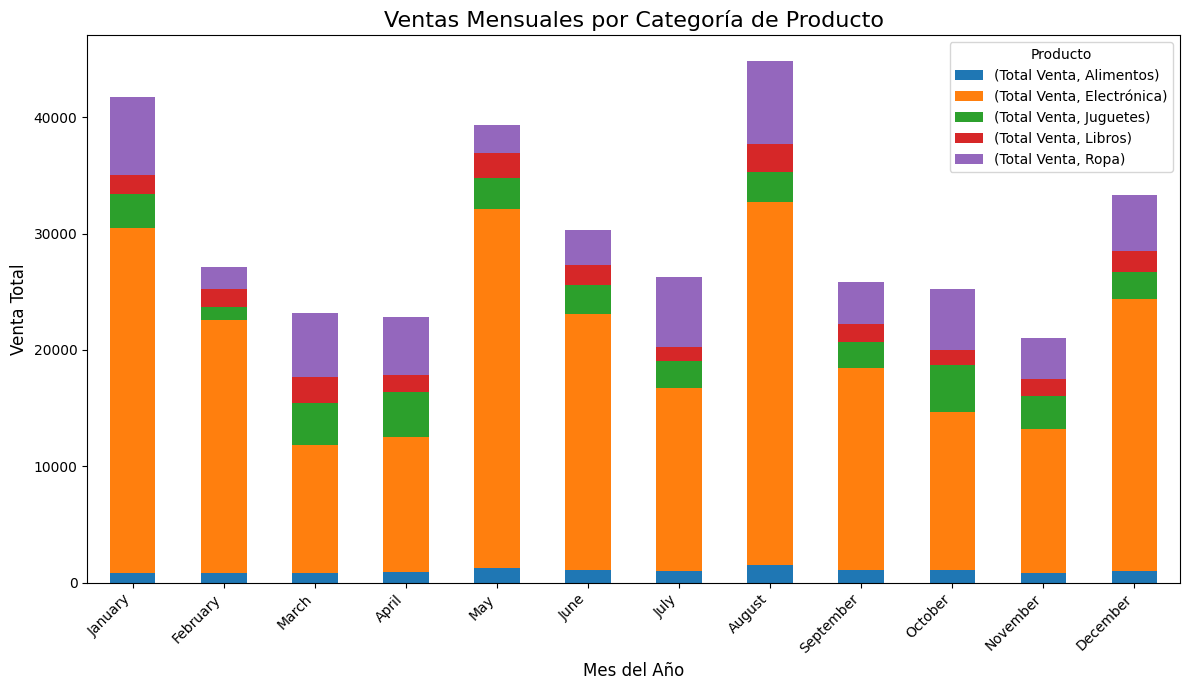

In [39]:
ventas_categoria_unstack = ventas_categoria.unstack(level='Producto')

ventas_categoria_unstack.plot(kind='bar', stacked=True, figsize=(12, 7))

# Add labels and a title for clarity
plt.title('Ventas Mensuales por Categoría de Producto', fontsize=16)
plt.xlabel('Mes del Año', fontsize=12)
plt.ylabel('Venta Total', fontsize=12)

# Rotate X-axis labels to prevent overlap and make them readable
plt.xticks(rotation=45, ha='right')

# Add a legend to identify the product categories
plt.legend(title='Producto')

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
ventas_categoria_total = pd.DataFrame(df_meses.groupby(['Producto'])['Total Venta'].sum())
ventas_categoria_total.reset_index(inplace=True)
ventas_categoria_total.sort_values(by='Total Venta', inplace=True, ascending=False, ignore_index=True)
ventas_categoria_total

,Producto,Total Venta
0,Electrónica,240600
1,Ropa,54900
2,Juguetes,32850
3,Libros,20460
4,Alimentos,12230


### **Exportar CSV**

In [19]:
def guardar_csv(dataFrame, ruta, nombre):
    if dataFrame is None:
        print('Data frame no asignado')
        return
    if ruta is None:
        print('Ruta no asignada')
        return
    dataFrame.to_csv(ruta + nombre + '.csv', index = False)
    print('CSV guardado con exito')    

In [20]:
ruta_de_guardado = 'C:/Users/btole/Desktop/Pandas Udemy/export/'

In [21]:
guardar_csv(df_meses, ruta_de_guardado, 'Pj7_DataFrame')

CSV guardado con exito


In [22]:
guardar_csv(mes_mas_ventas, ruta_de_guardado, 'Pj7_MesMayoresVentas')

CSV guardado con exito


In [23]:
guardar_csv(ventas_categoria, ruta_de_guardado, 'Pj7_VentasCategoria')

CSV guardado con exito


In [24]:
guardar_csv(ventas_categoria_total, ruta_de_guardado, 'Pj7_TotalVentasPorProducto')

CSV guardado con exito
